# S-Weak order and s-Permutahedra I : Combinatorics and lattice structure

Sage demo worksheet

In [1]:
from viewLatex import viewLatex
from spermutahedron import *

Note: *In the following, I use a function `viewLatex` to print objects (trees and lattices) directly in the notebook. This might not work in your local confirguation. In this case, just replace it with `view`*

In [5]:
view = viewLatex

## The $s$-weak order

### $s$-decreasing trees

Let $s = (s_1, \dots, s_n)$ be a sequence of non negative integers, an $s$-decreasing tree is a labelled ordered tree such that the node $i$ has $s_i+1$ children and the labels are decreasing from the root to the leaves

In [3]:
SD = SDecreasingTrees((1,2,2)); SD

S-decreasing trees of (1, 2, 2)

In [4]:
sd = SD.an_element()

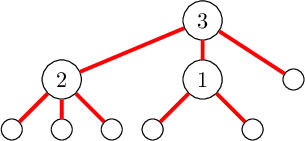

In [6]:
view(sd)

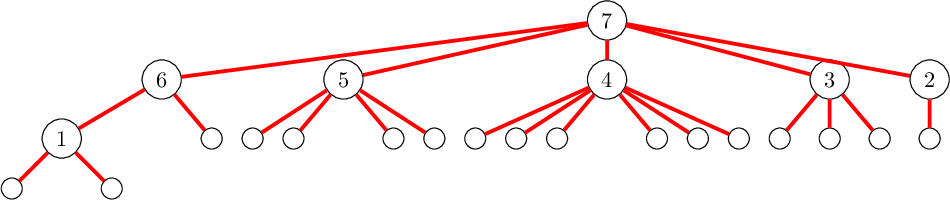

In [7]:
SD = SDecreasingTrees([1,0,2,5,3,1,4])
sd = SD.an_element()
view(sd)

The number of $s$-decreasing trees is given by 
$$(s_n + 1)(s_n + s_{n-1} + 1) \dots (s_n + \dots + s_2 + 1)$$

In [10]:
SD = SDecreasingTrees((1,2,2))
SD.cardinality()

15

In [11]:
L = list(SD)
L

[3[2[[], [], []], 1[[], []], []],
 3[2[[], [], []], [], 1[[], []]],
 3[2[1[[], []], [], []], [], []],
 3[2[[], 1[[], []], []], [], []],
 3[2[[], [], 1[[], []]], [], []],
 3[1[[], []], 2[[], [], []], []],
 3[[], 2[[], [], []], 1[[], []]],
 3[[], 2[1[[], []], [], []], []],
 3[[], 2[[], 1[[], []], []], []],
 3[[], 2[[], [], 1[[], []]], []],
 3[1[[], []], [], 2[[], [], []]],
 3[[], 1[[], []], 2[[], [], []]],
 3[[], [], 2[1[[], []], [], []]],
 3[[], [], 2[[], 1[[], []], []]],
 3[[], [], 2[[], [], 1[[], []]]]]

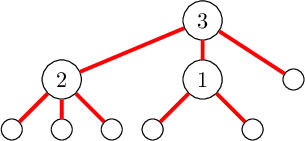

In [12]:
tree = L[0]
viewLatex(tree)

When $s$ does not contain any 0, you can see the associated multi permutation

In [13]:
tree.to_s_permutation()

[2, 2, 3, 1, 3]

Or construct the tree directly from the $s$-permutation

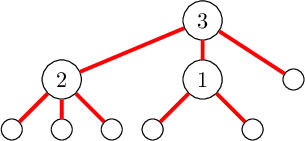

In [14]:
viewLatex(SDecreasingTrees.from_s_permutation([2,2,3,1,3]))

Here is the example of Fig. 3.

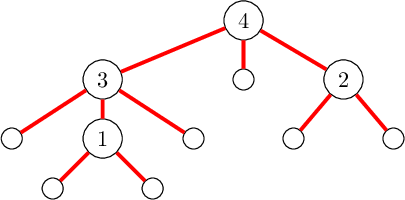

In [15]:
viewLatex(SDecreasingTrees.from_s_permutation([3,1,3,4,4,2]))

Otherwise, you can construct the tree using the tree inversion.

Here is the tree of Fig. 4. The constructor takes a tuple `(s,d)` where `s` is the sequence and `d` a python dictionnary of the tree-inversions.

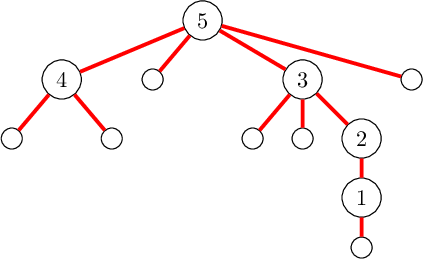

In [16]:
fig4 = SDecreasingTree(((0,0,2,1,3), {(5,3):2, (5,2):2, (5,1):2, (4,3):1, (4,2):1,(4,1):1, (3,2):2, (3,1):2}))
viewLatex(fig4)

Once the tree is constructed, you can access its tree-inversions this way

In [17]:
fig4.inversion(5,3)

2

In [18]:
fig4.inversion(5,4)

0

The inversions generator gives a list of all $(c,a)$ such that the cardinality of $(c,a)$ is greater than 0.

In [19]:
list(fig4.inversions())

[(4, 3), (5, 3), (4, 2), (5, 2), (3, 2), (4, 1), (5, 1), (3, 1)]

The tree is constructed using Algorithm 1.8 (ConstructTree). In particular, it is enough to provide the inversions $(c,a)$ between where $a$ is a descendant of $c$. For example, for Fig. 2.

In [20]:
fig4 = SDecreasingTree(((0,0,2,1,3), {(5,3):2, (5,2):2, (5,1):2, (3,2):2, (3,1):2}))

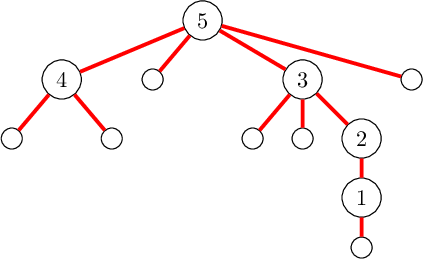

In [21]:
viewLatex(fig4)

The other inversions are updated after the construction.

In [22]:
fig4.inversion(4,3)

1

### The $s$-weak lattice

You can construct the $s$-weak lattice from the set of $s$-decreasing trees.

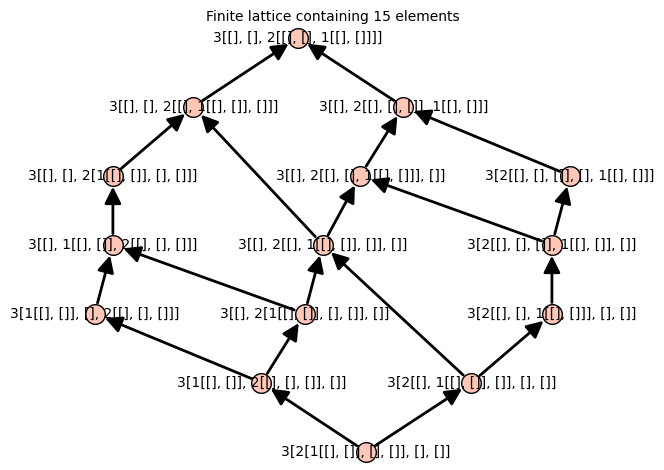

In [23]:
SD = SDecreasingTrees((1,2,2))
SD.lattice()

We have created a nice LaTeX layout for $2$-dimensional case $n \leq 3$

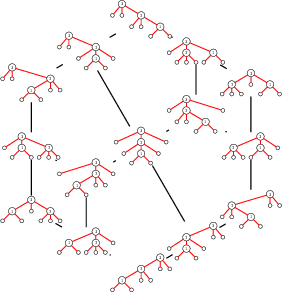

In [24]:
viewLatex(SD.lattice_printer())

Here are the examples of Fig.6.

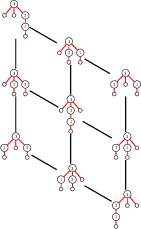

In [25]:
viewLatex(SDecreasingTrees((0,0,2)).lattice_printer())

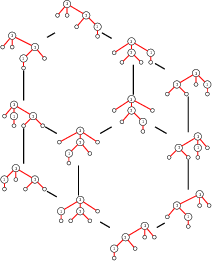

In [26]:
viewLatex(SDecreasingTrees((0,1,2)).lattice_printer())

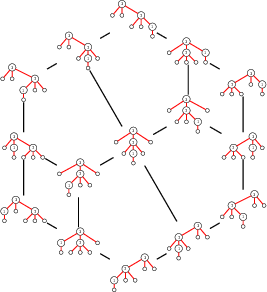

In [27]:
viewLatex(SDecreasingTrees((0,2,2)).lattice_printer())

In [ ]:
viewLatex(SDecreasingTrees((0,3,2)).lattice_printer())

The code also contains all the needed poset / lattice computations. Here is the compuation of the join given on Fig. 7.

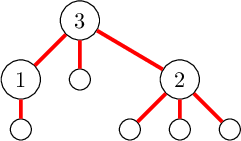

In [33]:
tree1 = SDecreasingTree(((0,2,2),{(3,2):2}))
viewLatex(tree1)

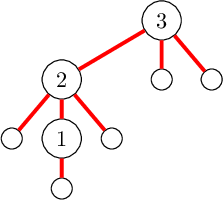

In [34]:
tree2 = SDecreasingTree(((0,2,2),{(2,1):1}))
viewLatex(tree2)

In [35]:
tree1.sweak_lequal(tree2)

False

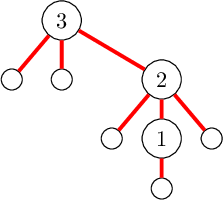

In [36]:
join = tree1.sweak_join(tree2)
viewLatex(join)

In [37]:
tree1.sweak_lequal(join)

True

In [38]:
tree2.sweak_lequal(join)

True

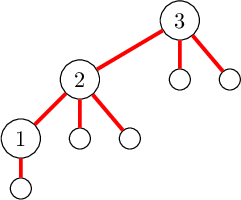

In [39]:
meet = tree1.sweak_meet(tree2)
viewLatex(meet)

In [40]:
meet.sweak_lequal(tree1)

True

In [41]:
meet.sweak_lequal(tree2)

True

### Cover relations

You have also access to tree-ascents and successors / predecessors in the lattice. See here Example 1.26.

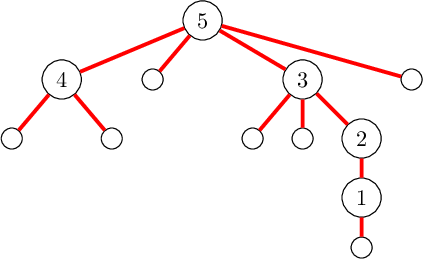

In [42]:
fig4 = SDecreasingTree(((0,0,2,1,3), {(5,3):2, (5,2):2, (5,1):2, (4,3):1, (4,2):1,(4,1):1, (3,2):2, (3,1):2}))
viewLatex(fig4)

In [43]:
list(fig4.tree_ascents())

[(1, 5), (2, 5), (4, 5)]

In [44]:
list(fig4.sweak_succ())

[5[4[[], []], [], 3[[], [], 2[[]]], 1[[]]],
 5[4[[], []], [], 3[[], [], 1[[]]], 2[[]]],
 5[[], 4[[], []], 3[[], [], 2[1[[]]]], []]]

In [45]:
list(fig4.tree_descents())

[(3, 1), (3, 2), (5, 3)]

In [46]:
list(fig4.sweak_prec())

[5[4[[], []], [], 3[[], 1[[]], 2[[]]], []],
 5[4[[], []], [], 3[[], 2[[]], 1[[]]], []],
 5[4[[], []], 3[[], [], []], 2[1[[]]], []]]

Here, the example of Fig. 9.

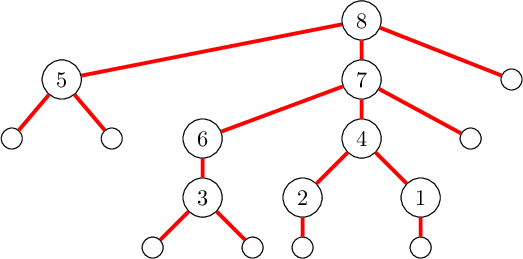

In [47]:
fig9 = SDecreasingTree(((0,0,1,1,1,0,2,2), {(8,7):1, (8,6):1, (8,4):1, (8,3):1, (8,2):1, (8,1):1, (7,4):1, (7,2):1, (7,1):1, (4,1):1}))
viewLatex(fig9)

In [48]:
list(fig9.tree_ascents())

[(1, 7), (2, 4), (3, 7), (5, 8), (6, 7), (7, 8)]

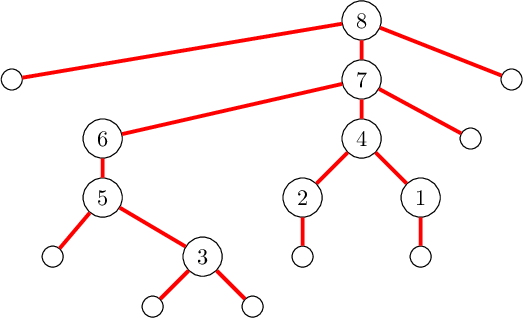

In [49]:
viewLatex(fig9.rotate_ascent((5,8)))

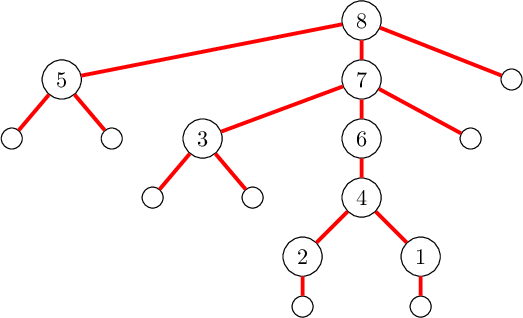

In [50]:
viewLatex(fig9.rotate_ascent((6,7)))

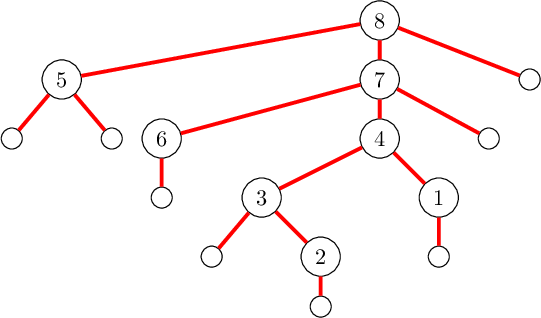

In [51]:
viewLatex(fig9.rotate_ascent((3,7)))

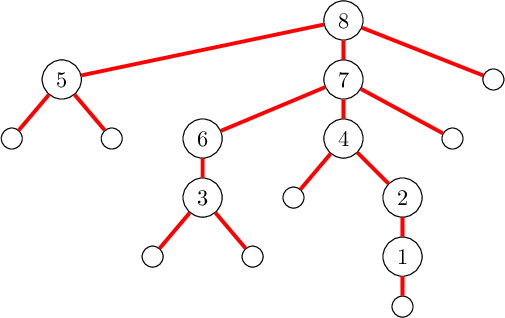

In [52]:
viewLatex(fig9.rotate_ascent((2,4)))

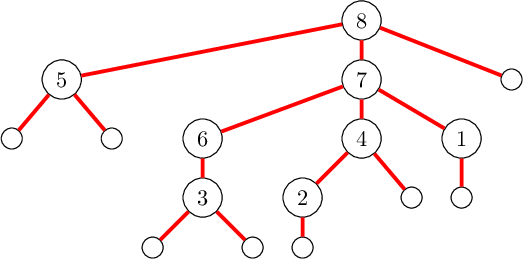

In [53]:
viewLatex(fig9.rotate_ascent((1,7)))

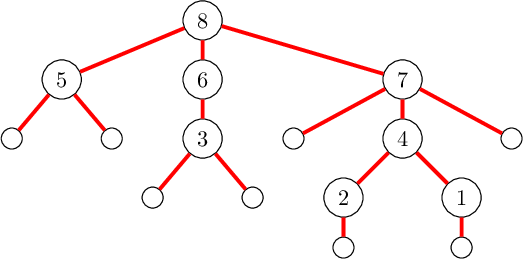

In [54]:
viewLatex(fig9.rotate_ascent((7,8)))

### A Semidistributive, congruence uniform, polygonal lattice.

Some of the properties of Section 1.5 can be checked directly with Sage on examples.

Semi-distributivity:

In [55]:
SDecreasingTrees.some_s()

[(),
 (0,),
 (1,),
 (0, 1),
 (0, 2),
 (0, 1, 1),
 (0, 2, 2),
 (0, 0, 2),
 (0, 1, 1, 1),
 (0, 2, 2, 2),
 (0, 3, 3, 3),
 (0, 1, 0, 2),
 (0, 1, 1, 2, 2),
 (0, 0, 1, 0, 0, 2)]

In [56]:
all(SDecreasingTrees(s).lattice().is_semidistributive() for s in SDecreasingTrees.some_s())

True

Doubling construction (i.e. congruence uniform)

In [57]:
all(SDecreasingTrees(s).lattice().is_constructible_by_doublings("interval") for s in SDecreasingTrees.some_s())

True

In [61]:
list(SD.lattice_doublings())

[Finite poset containing 1 elements,
 Finite poset containing 2 elements,
 Finite poset containing 3 elements,
 Finite poset containing 6 elements,
 Finite poset containing 8 elements,
 Finite poset containing 12 elements,
 Finite poset containing 15 elements]

## The $s$-Tamari lattice

### The sublattice of $s$-Tamari trees

You can easily test if a tree is an $s$-Tamari tree

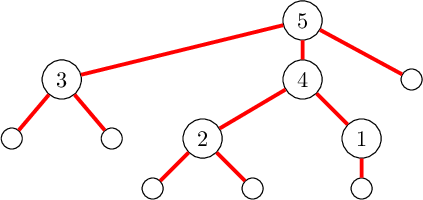

In [58]:
dt = SDecreasingTree(([0,1,1,1,2], {(5,4):1, (5,2):1, (5,1):1, (2,1):1, (4,1):1}))
viewLatex(dt)

In [59]:
dt.is_s_tamari()

False

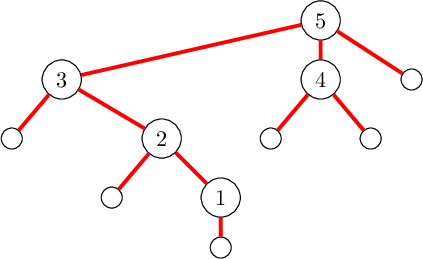

In [60]:
dt = SDecreasingTree(([0,1,1,1,2], {(5,4):1, (3,2):1, (3,1):1, (2,1):1}))
viewLatex(dt)

In [61]:
dt.is_s_tamari()

True

You can get the list of $s$-Tamari trees and print the lattice.

In [62]:
s = (0,2,3)
SD023 = SDecreasingTrees(s)
list(SD023.s_tamari_trees())

[3[2[1[[]], [], []], [], [], []],
 3[2[[], 1[[]], []], [], [], []],
 3[2[[], [], 1[[]]], [], [], []],
 3[1[[]], 2[[], [], []], [], []],
 3[[], 2[1[[]], [], []], [], []],
 3[[], 2[[], 1[[]], []], [], []],
 3[[], 2[[], [], 1[[]]], [], []],
 3[1[[]], [], 2[[], [], []], []],
 3[[], 1[[]], 2[[], [], []], []],
 3[[], [], 2[1[[]], [], []], []],
 3[[], [], 2[[], 1[[]], []], []],
 3[[], [], 2[[], [], 1[[]]], []],
 3[1[[]], [], [], 2[[], [], []]],
 3[[], 1[[]], [], 2[[], [], []]],
 3[[], [], 1[[]], 2[[], [], []]],
 3[[], [], [], 2[1[[]], [], []]],
 3[[], [], [], 2[[], 1[[]], []]],
 3[[], [], [], 2[[], [], 1[[]]]]]

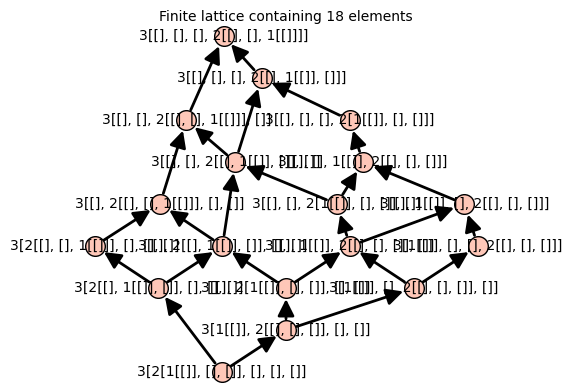

In [63]:
L = SD023.s_tamari_lattice()
L

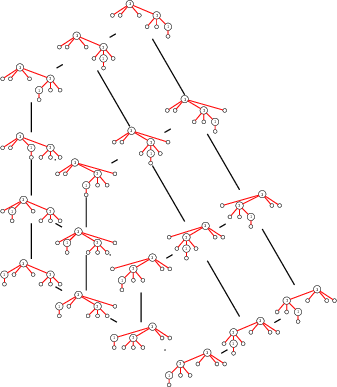

In [64]:
viewLatex(SD023.s_tamari_lattice_printer())

### The $s$-Tamari lattice as a quotient of the $s$-weak order

You can compupte $\pi_\downarrow$ and $\pi_\uparrow$. Here is the example of Fig. 13.

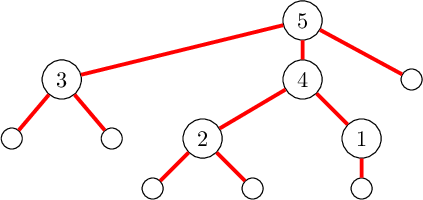

In [68]:
dt = SDecreasingTree(([0,1,1,1,2], {(5,4):1, (5,2):1, (5,1):1, (2,1):1, (4,1):1}))
viewLatex(dt)

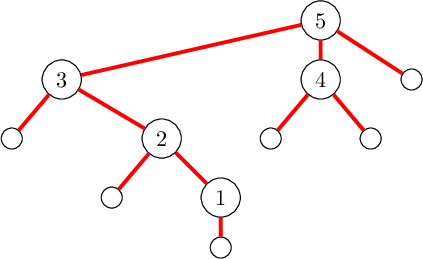

In [69]:
viewLatex(dt.to_s_tamari_min())

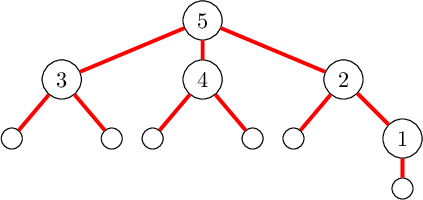

In [70]:
viewLatex(dt.to_s_tamari_max())

You can compute the whole class of a given tree, as in Fig. 14.

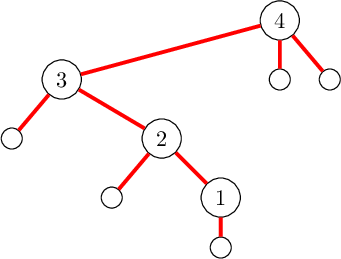

In [71]:
dt = SDecreasingTree([(0,1,1,2),{(3,1):1, (3,2):1, (2,1):1}])
viewLatex(dt)

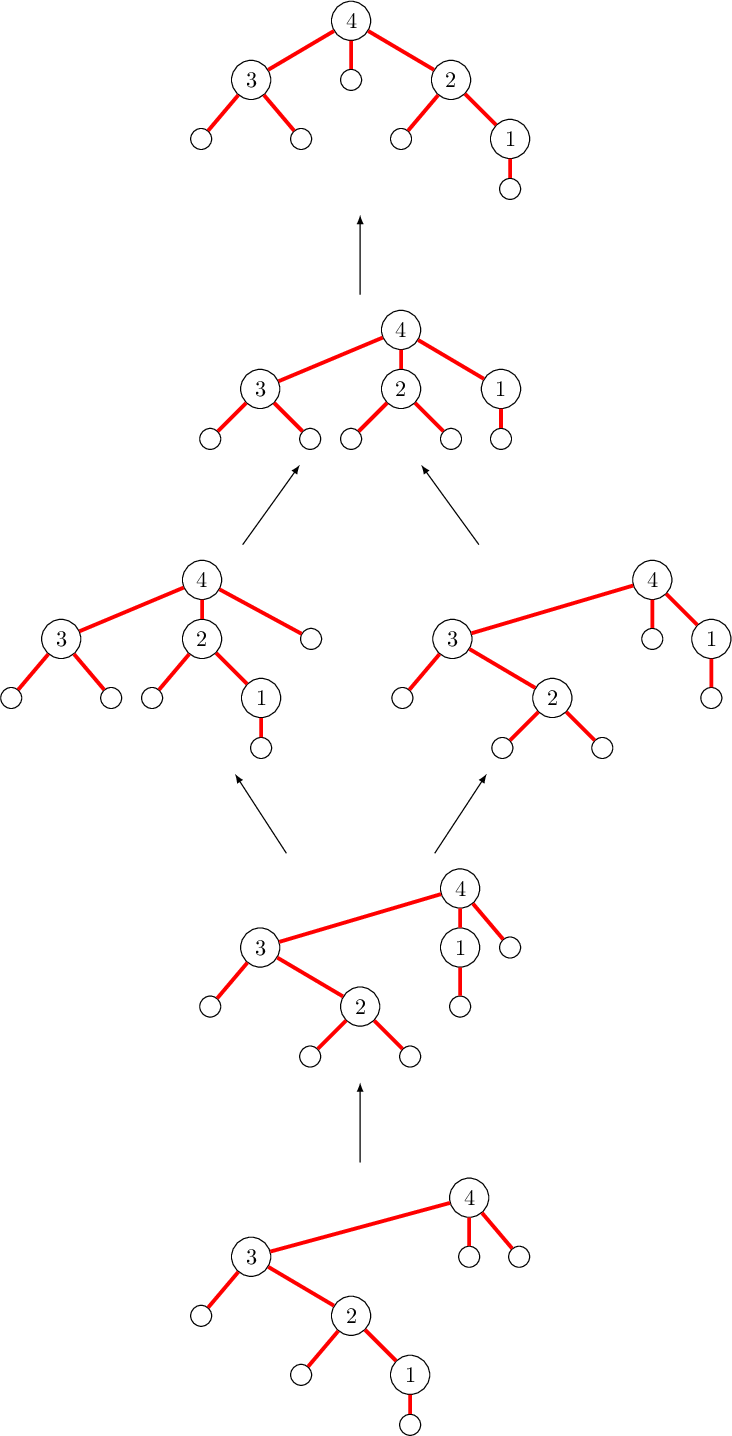

In [72]:
L = LatticePoset([list(dt.s_tamari_class()), lambda x,y: x.sweak_lequal(y)])
viewLatex(L)

### Cover relations

When you create an $s$-decreasing tree which is an $s$-Tamari tree, you can compute its successors in the $s$-Tamari lattice.

In [73]:
dt = SDecreasingTree(((0,0,1,1,2,1,2), {(5,3):1, (5,4):2, (7,6):1}))

In [74]:
dt.is_s_tamari()

True

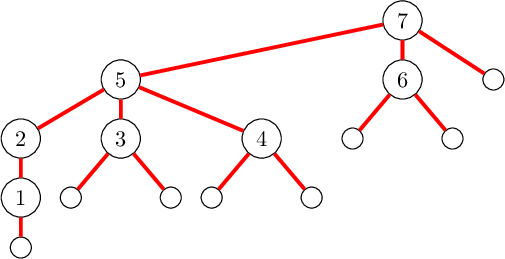

In [75]:
viewLatex(dt)

In [76]:
list(dt.tamari_ascents())

[(2, 5), (3, 5), (5, 7), (6, 7)]

In [77]:
list(dt.s_tamari_succ())

[7[5[1[[]], 3[2[[]], []], 4[[], []]], 6[[], []], []],
 7[5[2[1[[]]], [], 4[3[[], []], []]], 6[[], []], []],
 7[2[1[[]]], 6[5[[], 3[[], []], 4[[], []]], []], []],
 7[5[2[1[[]]], 3[[], []], 4[[], []]], [], 6[[], []]]]

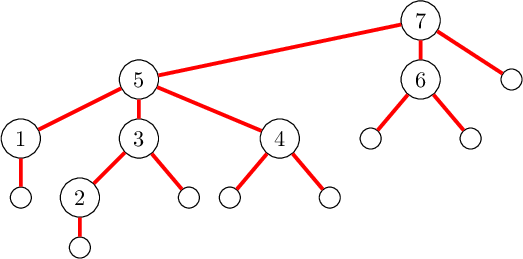

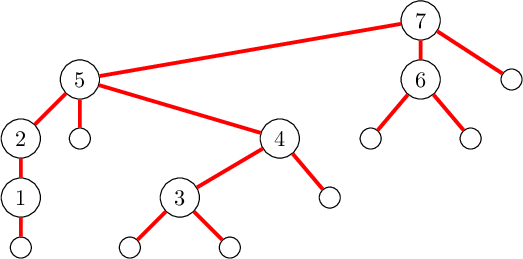

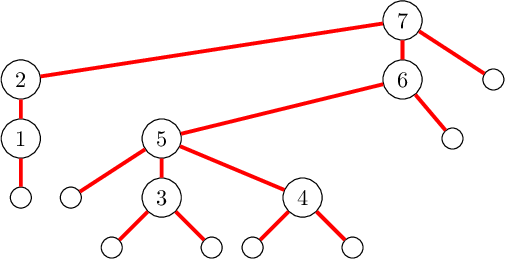

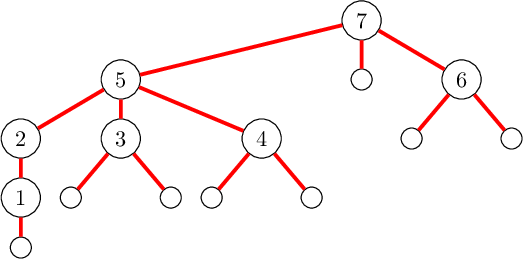

In [78]:
viewLatex(list(dt.s_tamari_succ()))

### $\nu$-trees, $\nu$-paths and $\nu$-Tamari lattice

We have coded $\nu$-trees and $\nu$-paths

In [79]:
SD = SDecreasingTrees((0,2,2))

In [80]:
SD.nu_trees()

NuTrees of (2, 2, 0)

In [81]:
SD.nu_paths()

NuPaths of (2, 2, 0)

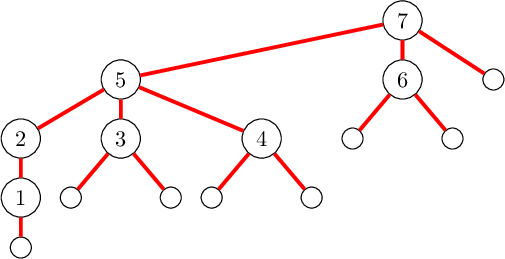

In [82]:
dt = SDecreasingTree(((0,0,1,1,2,1,2), {(5,3):1, (5,4):2, (7,6):1}))
viewLatex(dt)

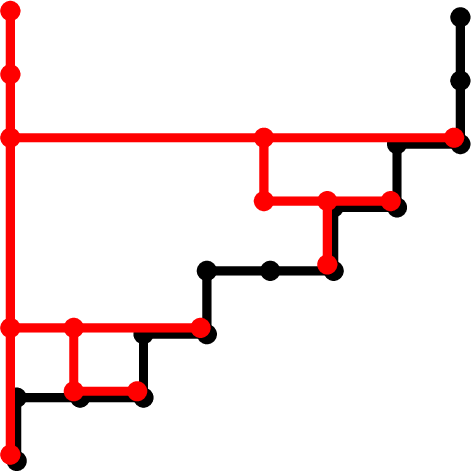

In [83]:
viewLatex(dt.to_nu_tree())

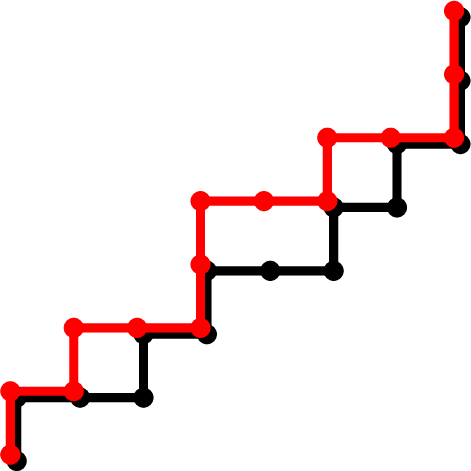

In [84]:
viewLatex(dt.to_nu_path())

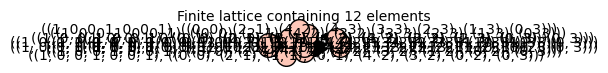

In [85]:
SD.nu_tamari_lattice_trees()

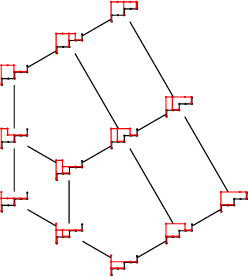

In [86]:
viewLatex(SD.nu_tamari_lattice_printer_trees())

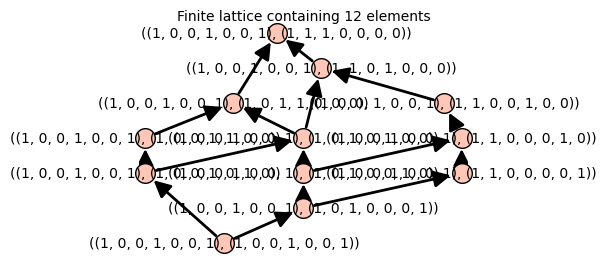

In [87]:
SD.nu_tamari_lattice_paths()

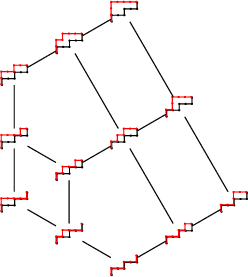

In [88]:
viewLatex(SD.nu_tamari_lattice_printer_paths())